In [383]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [384]:
df = pd.read_csv('housing_cleaned.csv')
df2 = pd.read_csv('housing_cleaned.csv')

In [385]:
df2 = df2[df2["Size"].str.contains("N/A") == False]
df2 = df2[df2["Size"].str.contains("Limited") == False]
df2= df2[df2["Bedrooms"].str.contains("5+") == False]
df = df[df["Bedrooms"].str.contains("5+") == False]
df2["Style"] = df2["Style"].str.replace('Duplex/Triplex', 'Duplex')
df2['Bedrooms'] = df2["Bedrooms"].astype(float)
df2['Bathrooms'] = df2["Bathrooms"].astype(float)
df['Bedrooms'] = df["Bedrooms"].astype(float)
df['Bathrooms'] = df["Bathrooms"].astype(float)
df2['Size'] = df2["Size"].astype(float)

In [386]:
status = pd.get_dummies(df2['Location'], dtype = int)
status3 = pd.get_dummies(df2['Style'], dtype = int)

df2 = pd.concat([df2, status, status3,], axis = 1)

df2.drop(columns = 'Unnamed: 0', inplace = True)
df2.drop(columns='Location',inplace=True)
df2.drop(columns='Den',inplace=True)
df2.drop(columns='Bachelor/Studio',inplace=True)
df2.drop(columns='Style',inplace=True)
df2.drop(columns='Air Conditioned  ',inplace=True)
df2.drop(columns = 'Title', inplace = True)

In [387]:
df2 = df2[df2['Size'] > 50]
df2 = df2[df2['Size'] < 3600]
df2 = df2[df2['Price'] > 1250]

In [388]:
df2

,Price,Bedrooms,Bathrooms,Size,Guelph,Hamilton,Kitchener,London,Ottawa,Toronto,Apartment,Basement,Condo,Duplex,House,Townhouse
0,1700,2.0,1.0,800.0,1,0,0,0,0,0,0,1,0,0,0,0
2,2381,1.0,1.0,721.0,1,0,0,0,0,0,1,0,0,0,0,0
3,2798,2.0,2.0,1002.0,1,0,0,0,0,0,1,0,0,0,0,0
4,2250,1.0,1.0,710.0,1,0,0,0,0,0,1,0,0,0,0,0
6,1879,1.0,1.0,617.0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,3395,2.0,1.0,899.0,0,0,0,0,0,1,1,0,0,0,0,0
1192,2200,1.0,1.0,550.0,0,0,0,0,0,1,0,0,1,0,0,0
1193,2200,2.0,1.0,2000.0,0,0,0,0,0,1,0,1,0,0,0,0
1195,2645,2.0,1.0,815.0,0,0,0,0,0,1,1,0,0,0,0,0


In [389]:
numeric_cols = df2.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print(corr['Price'].sort_values(ascending = False), '\n')

Price         1.000000
Size          0.601741
Bedrooms      0.586226
Bathrooms     0.507180
 House        0.343329
Toronto       0.202376
Kitchener     0.117977
 Condo        0.105655
 Townhouse    0.044398
Guelph        0.004285
London       -0.020289
 Duplex      -0.044215
 Apartment   -0.079342
Hamilton     -0.080098
Ottawa       -0.209750
 Basement    -0.224784
Name: Price, dtype: float64 



In [390]:
df_model = df2

#Get dummy data
df_dum = pd.get_dummies(df_model, dtype = int)

In [391]:
#Train test split
X = df_dum.drop('Price', axis =1)
y = df_dum['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Price')

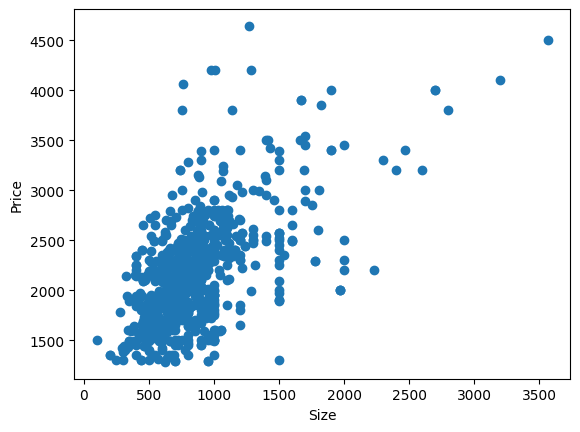

In [392]:
plt.scatter(x = df2['Size'], y = df2['Price'])
plt.xlabel('Size')
plt.ylabel('Price')

In [393]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predicitions = model.predict(X_test)
model.score(X_test, y_test)

0.6873136497599877

In [394]:
y_test[:10]

1046    2495
1008    2499
77      2494
791     1550
80      2282
937     2459
489     1799
724     1440
1128    2098
684     1976
Name: Price, dtype: int64

In [395]:
X_test[:1]

,Bedrooms,Bathrooms,Size,Guelph,Hamilton,Kitchener,London,Ottawa,Toronto,Apartment,Basement,Condo,Duplex,House,Townhouse
1046,0.0,1.0,540.0,0,0,0,0,0,1,1,0,0,0,0,0


In [396]:
model.predict(X_test[:10])

array([2049.15625979, 2276.52610236, 2319.54774066, 1504.02045803,
       2014.05689002, 2123.0145704 , 1869.95087573, 1492.00184141,
       2280.13168735, 2077.34382722])

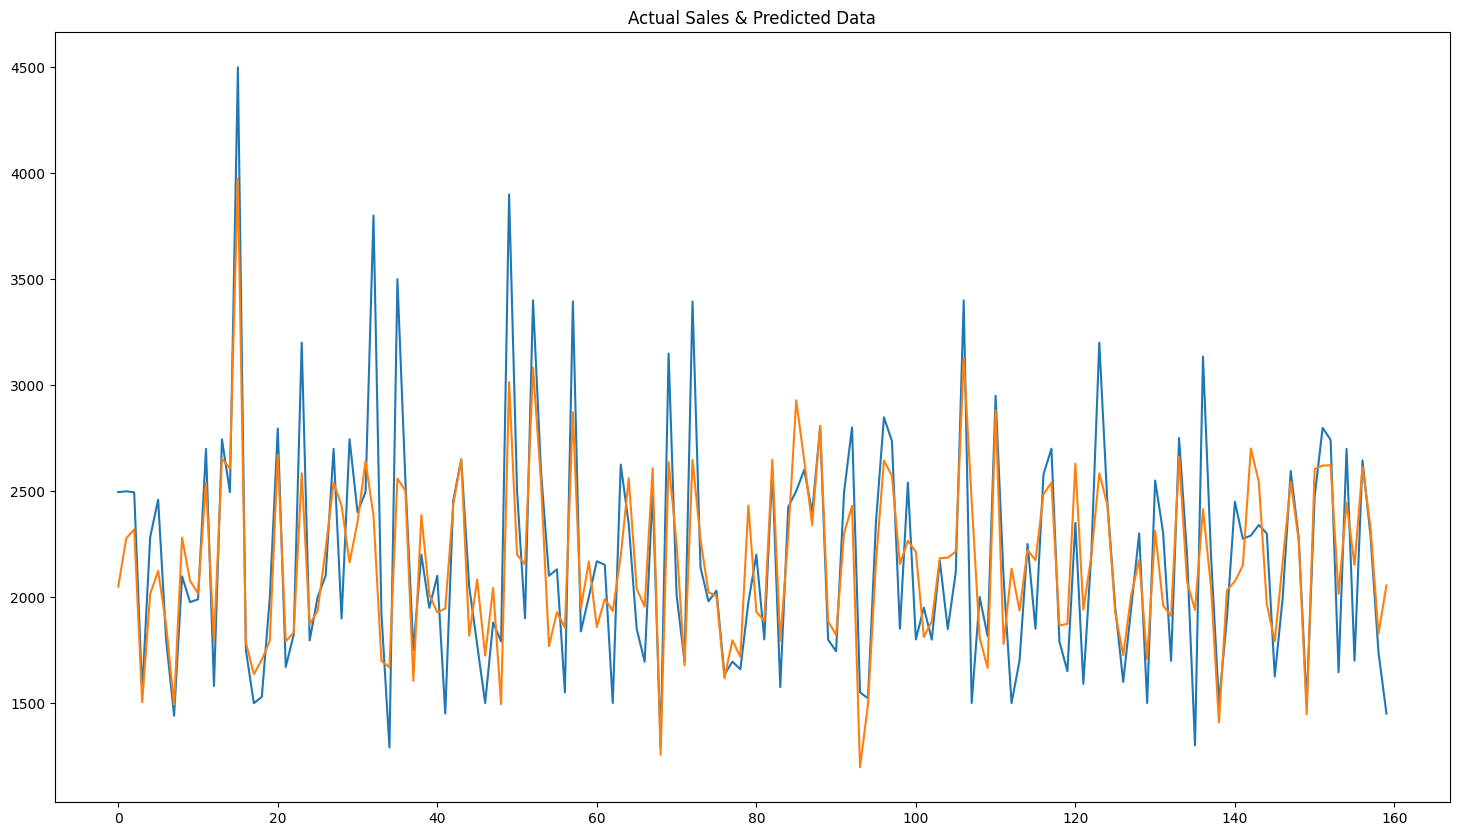

In [397]:
plt.figure(figsize=(18,10))
x_ax = range(len(y_test)) 
plt.plot(x_ax, y_test, label = "original")
plt.plot(x_ax, predicitions, label = "predicted")
plt.title("Actual Sales & Predicted Data")
plt.legend
plt.show()

In [398]:
for column in X.columns:
    print(column)

Bedrooms
Bathrooms
Size
Guelph
Hamilton
Kitchener
London
Ottawa
Toronto
 Apartment
 Basement
 Condo
 Duplex
 House
 Townhouse


In [399]:
import pickle
filename = 'housing_model.sav' 
pickle.dump(lr, open(filename, 'wb'))


loaded_model = pickle.load(open('housing_model.sav', 'rb'))